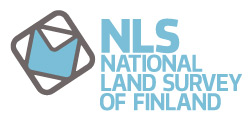


                    Ohjelma Conclusions-kansion tekemistä varten / 
                    The software to produce Conclusions folder
                   
                    Author: Tuukka Mattila
                    Do not hesitate to contact via LinkedIn:
                    https://www.linkedin.com/in/tuukkamattila/
                    
                    Thank you for the help: Topi Rikkinen, Marko Ollikainen, Antti Laaksonen, 
                    Hannu Koivula, Octavian Andrei, Mikael Kauhava, Timo Sallinen and Ari Huvinen

Laitetaan kello päälle ohjelman ajan mittaamiseksi. / Let's start the clock for the program to measure the time spent:

In [2]:
import time
time_beginning = time.time()

Tuodaan tarvittavat kirjastot / Import necessary Python libraries:

In [3]:
from IPython.display import Markdown, display, YouTubeVideo, HTML
import os
import sys
import glob
import pathlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PyPDF2 import PdfFileMerger
import table3_df_definition
import grading_conclusions

Määritetään funktio, joka ajaa NLS GNSS SOFAMESA Conclusions -ohjelman. / Let's define a function, which runs the NLS GNSS SOFAMESA Conclusions software:

In [4]:
def run_NLS_GNSS_SOFAMESA_conclusions(name_of_GNSS_device_or_NRTK_method, testmeasurements_df_name):
    %run NLS_GNSS_SOFAMESA_conclusions.ipynb
    return table1_df, table2_df, filename_path

Määritetään Conclusions kansion nimeksi / Let's define Conclusions as the folder name:

In [1]:
# Earlier defined in NLS_GNSS_SOFAMESA_MAIN_PROGRAM.ipynb file
# conclusions_folder_name = 'Conclusions'
# conclusions_folder_path = '{0}{2}{1}'.format(reference_point_folder_path, conclusions_folder_name, os.sep)

Nimetään aiemmin määritetty referenssipiste. / Let's name the earlier defined reference point:

In [7]:
referencepoint_number = name_of_the_reference_point_folder

while referencepoint_number != name_of_the_reference_point_folder or referencecoordinates_df.loc[referencecoordinates_df['Reference Point Number'] == referencepoint_number].empty is True:
    print("That's not a valid Reference Point Number in your .txt or .csv file or some data doesn't meet the requirements! Try again!")
    referencecoordinates_df = pd.read_csv(input("Enter the name of the reference points file (.txt or .csv). The data has to be formatted as (Reference Point Number,Northing,Easting,Elevation) and the file has to be located in the same folder as this Jupyter Notebook file:\n"), delimiter=',')

Kysytään kaikkien mittauskertojen lukumäärä referenssipisteellä, jolla on mitattu. / Let's ask the total number of visits to the reference point, on which the measurements have been made:

In [ ]:
total_number_of_visits_at_the_reference_point = str(input("Enter the total number of visits to the reference point on which the measurements have been made:\n"))

Kysytään ladattavien tiedostojen lukumäärä / Let's ask the number of files to be uploaded:

In [ ]:
number_of_files = int(input("Enter the number of files to be uploaded:\n"))

Määritetään oletustoleranssiarvoiksi Pohjois- ja Itäsuunnissa 0.1m ja korkeudessa 0.2m (tai kysytään toleranssiarvot) outlier-havaintojen poistamiseksi / Let's define the default tolerance values for North and East 0.1m and Height 0.2m (or ask the tolerance values) for outlier removal:

In [10]:
# tolerance_north_east = float(input('Enter a single tolerance value (m) for both North and East, which will be used to remove outliers from the measurements (for example 0.1; THE VALUE HAS TO BE POSITIVE:\n'))
# tolerance_height = float(input('Enter a single tolerance value (m) for Height, which will be used to remove outliers from the measurements (for example 0.2; THE VALUE HAS TO BE POSITIVE:\n'))
tolerance_north_east = 0.1
tolerance_height = 0.2

while tolerance_north_east < 0 or tolerance_height < 0 or tolerance_north_east is None or tolerance_height is None:
    print("Those aren't valid numbers! Try again")
    tolerance_north_east = float(input('Enter a single tolerance value (m) for both North and East, which will be used to remove outliers from the measurements (for example 0.1; THE VALUE HAS TO BE POSITIVE:\n'))
    tolerance_height = float(input('Enter a single tolerance value (m) for Height, which will be used to remove outliers from the measurements (for example 0.1; THE VALUE HAS TO BE POSITIVE:\n'))

Määritetään, halutaanko tuottaa analyysiä FIXED-, FLOAT-, CODE_DIFF- ja STANDALONE-parametreistä raportteihin ja taulukoihin. Mittaustiedostoista täytyy löytyä "Solution"-sarakkeesta AINOASTAAN FIXED-, FLOAT-, CODE_DIFF- tai STANDALONE-nimisiä soluja, jos näistä halutaan tuottaa analyysiä.  / Let's define, if the user is willing to receive an analysis of FIXED, FLOAT, CODE_DIFF and STANDALONE parameters in the reports and tables. The test measurement files' column "Solution" should ONLY include cells named FIXED, FLOAT, CODE_DIFF or STANDALONE:

In [11]:
# solution_analysis = input("Do you want to receive an analysis of FIXED, FLOAT, CODE_DIFF and STANDALONE parameters in the reports and tables? The test measurement files' column Solution should ONLY include cells named FIXED, FLOAT, CODE_DIFF or STANDALONE. Enter 'yes' or 'no':\n")
solution_analysis = 'yes'
# solution_analysis = 'no'

Testataan, miten hyvin yllä oleva aineisto asettuu normaalijakauman mukaiseksi. Tuotetaan yllä olevan aineiston keskiarvojen ja -hajontojen avulla malli normaalijakaumalle. Hyödynnetään satunnaisen numeron tuottamista mallin luomiseksi ja lasketaan normaalijakaumat. Voit testata eri otoskoolla mallia./ Let's test, how well the data above can be fitted to follow the Gaussian distribution. We can produce a Gaussian distribution model with the help of the means and standard deviations of the test measurements. Let's utilize random number generation to produce the model and calculate distributions. You can test the model with varying sample sizes:

In [12]:
# size = int(input('Enter the sample size (for example 10, 100, 1000 or 10000; THE VALUES HAS TO BE BETWEEN 1-20000 AND AN INTEGER):\n'))
size = 10000

while int(size) < 1 or int(size) > 20000 or int(size) is None:
    print("Those aren't valid numbers! Try again")
    size = int(input('Enter the sample size (for example 10, 100, 1000 or 10000; THE VALUES HAS TO BE BETWEEN 1-20000 AND AN INTEGER):\n'))

Kysytään GNSS-laitteen tai verkko-RTK-menetelmän, jolla on mitattu, nimeä kansion nimeksi.

Kysytään myös testimittausten tiedoston nimi (koko nimi .txt- tai .csv-päätteellä). Testidataa pitää olla vähintään 3600 havaintoa per piste. Täyttyykö ehto? Esimerkiksi 10 sekunnin havaintojaksolla ja 1 epookin tallennusvälillä keskiarvoistettuja ratkaisuja tulisi olla 3600 kpl. Onko tiedostossa vähintään 3600 mittaustulosta pisteelle?

Tuodaan data .txt- tai .csv-muodossa, eroteltuna ","-merkillä ja muotoiltuna (sarakkeiden järjestyksellä ei ole väliä) [Point Number,Code,Date,Time,Solution,Physical Station ID,Virtual Station ID,Northing,Easting,Ell Ht,Elev,Ant Ht,HRMS,VRMS,HDOP,VDOP,PDOP,GDOP,TDOP,GPS,GLONASS,GALILEO,BEIDOU,SBAS,QZSS]/ 

/ 

Let's ask the name of the GNSS device or Network-RTK method, which have been utilized, as the folder name. 

Let's also ask the name of the testmeasurements file (the whole name with .txt or .csv ending). The test data should consist of at least 3600 measurements per reference point. Is the requirement met? For example, with 10 seconds measurement time and 1 second epocs, averaged solutions should be 3600 pcs. Does the file consist of at least 3600 measurements for the point?

Import the data in .txt or .csv and separated with "," and formatted as (the order of the columns doesn't matter) [Point Number,Code,Date,Time,Solution,Physical Station ID,Virtual Station ID,Northing,Easting,Ell Ht,Elev,Ant Ht,HRMS,VRMS,HDOP,VDOP,PDOP,GDOP,TDOP,GPS,GLONASS,GALILEO,BEIDOU,SBAS,QZSS]:

Enter the folder name of the GNSS device or Network-RTK method:
GPP
Folder already exists. Use the existing folder location of the GNSS device or Network-RTK method C:\Omat\Jupyter_Notebook\20190618_testiä1\1_2_E6\GPP.
Enter the name of the GPP testmeasurements file (the whole name with .txt or .csv ending). The data has to be formatted as (Point Number,Code,Date,Time,Solution,Physical Station ID,Virtual Station ID,Northing,Easting,Ell Ht,Elev,Ant Ht,HRMS,VRMS,HDOP,VDOP,PDOP,GDOP,TDOP,GPS,GLONASS,GALILEO,BEIDOU,SBAS,QZSS) and the file has to be located in the same folder as this Jupyter Notebook file:
20190524-A-90M9180-GPP2-1_lyh.txt


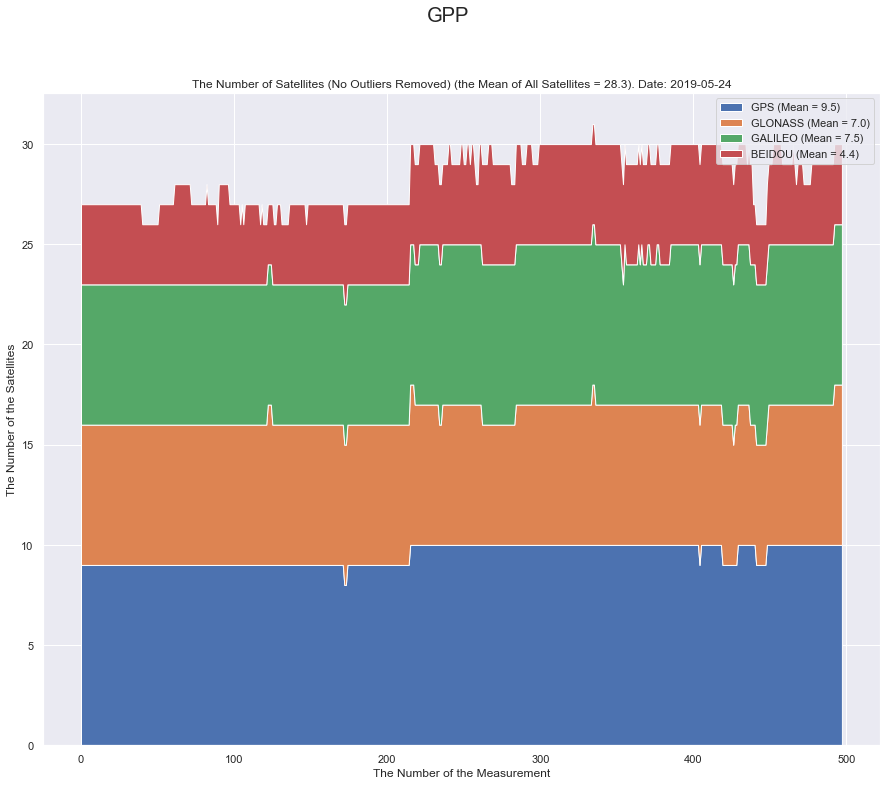

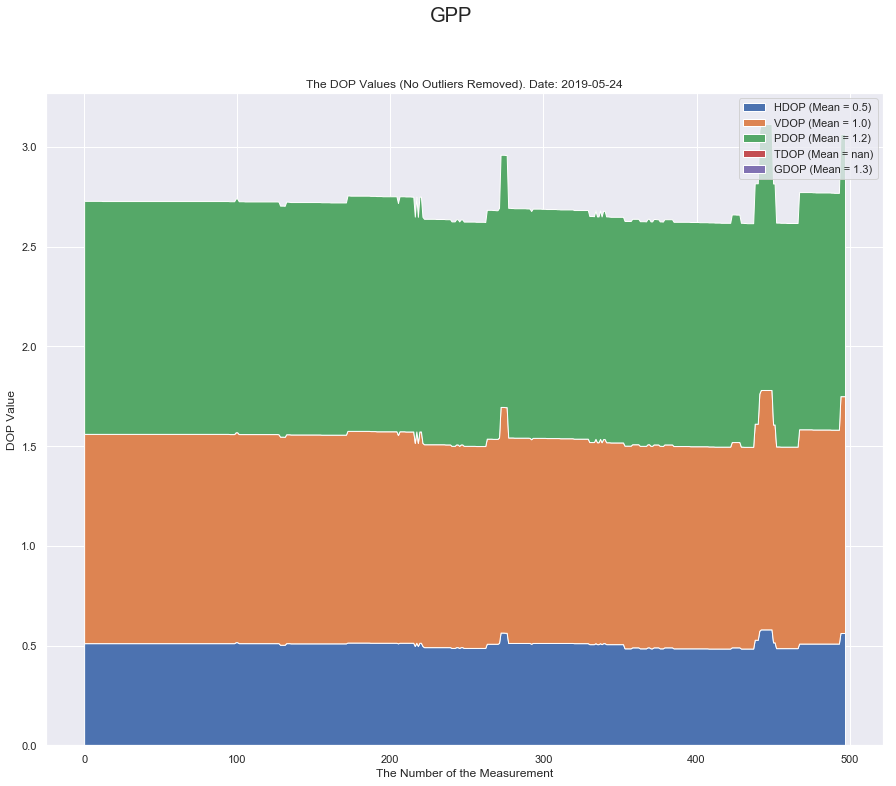

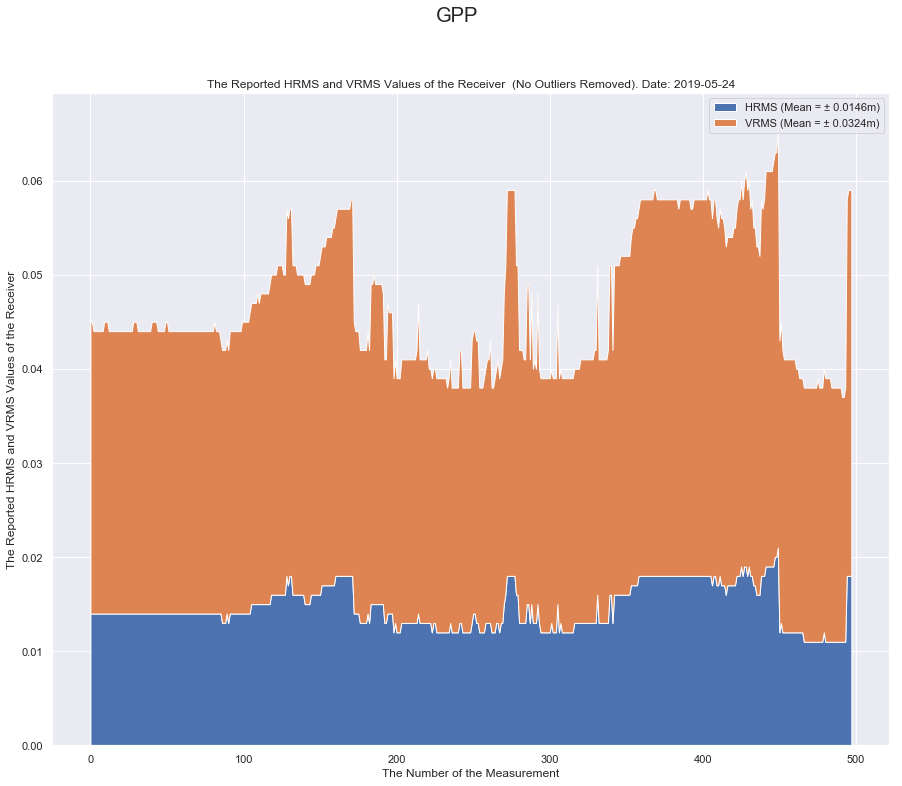

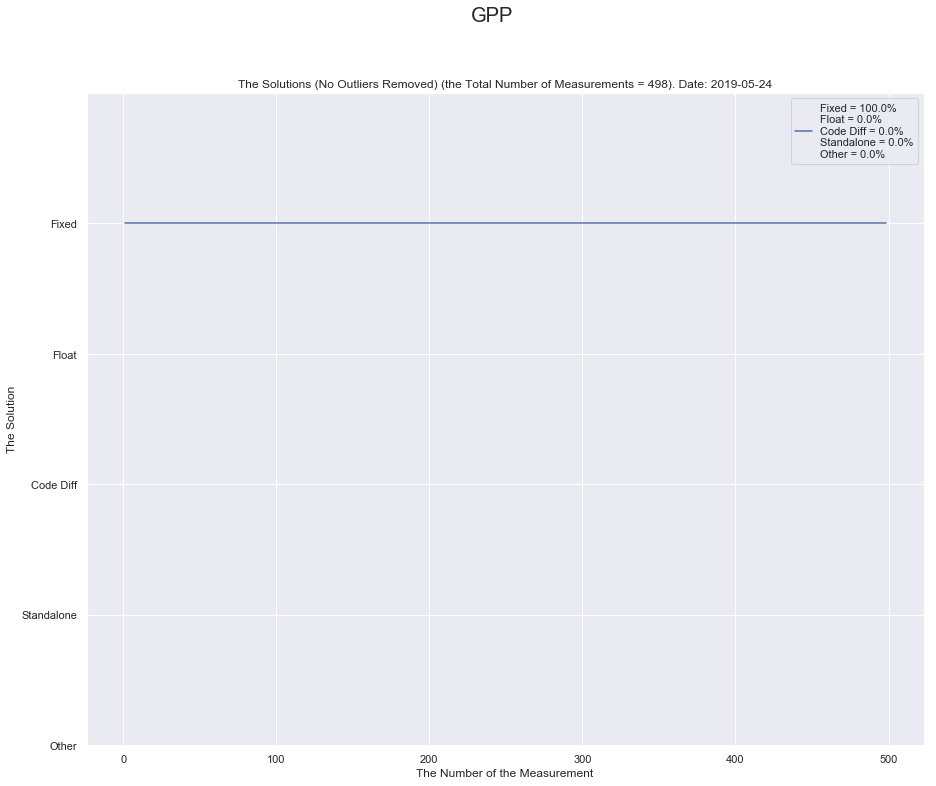

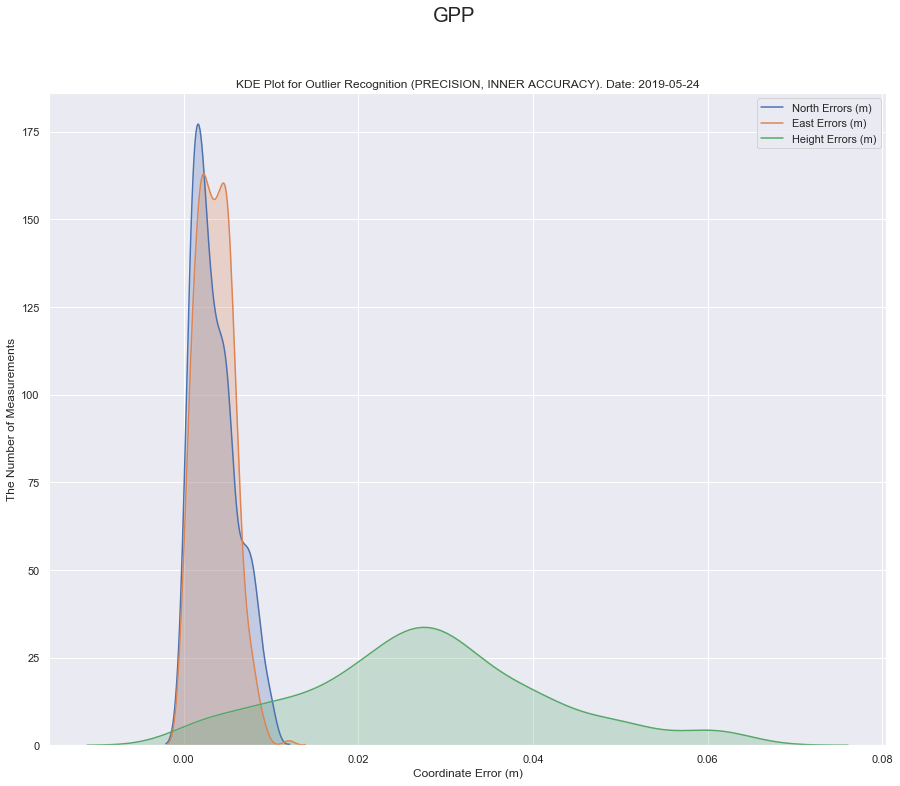

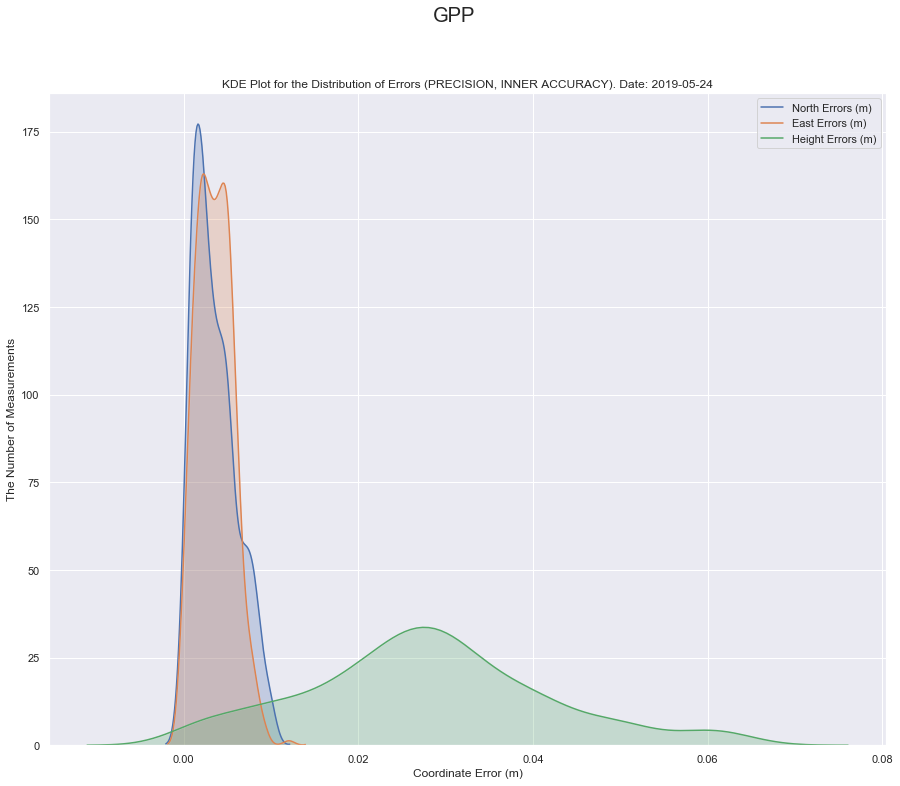

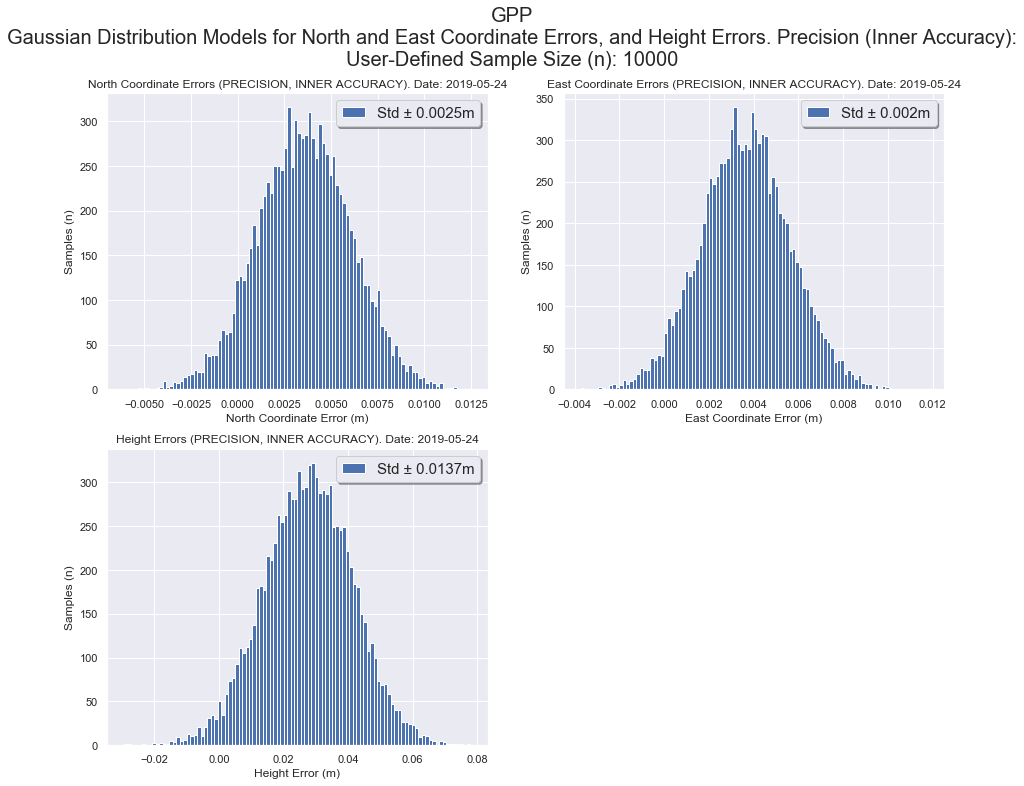

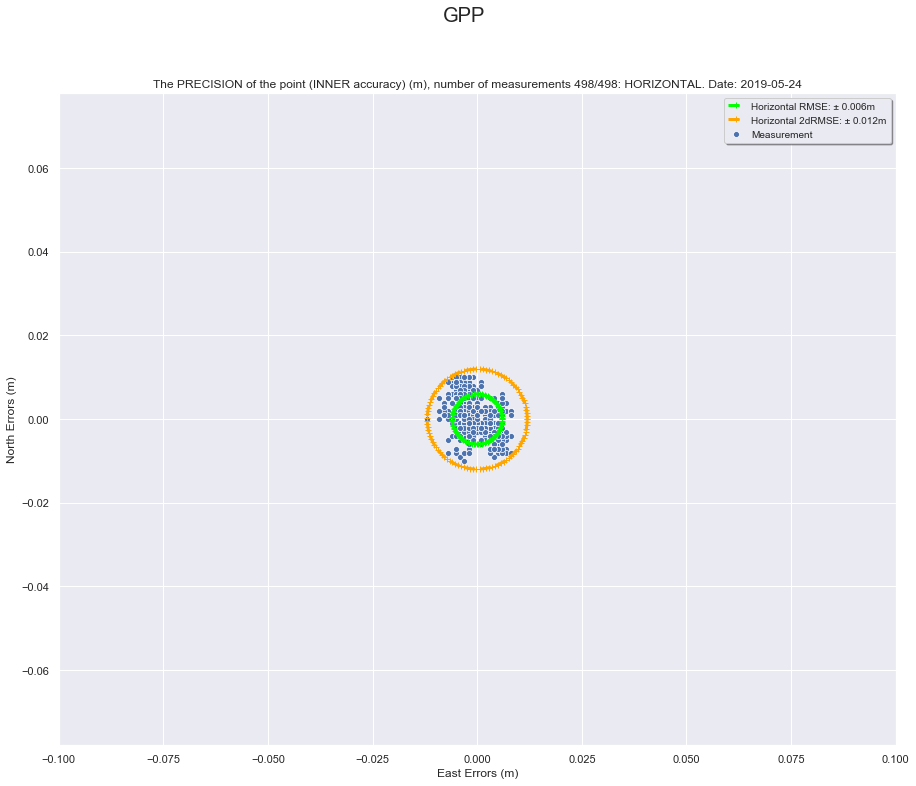

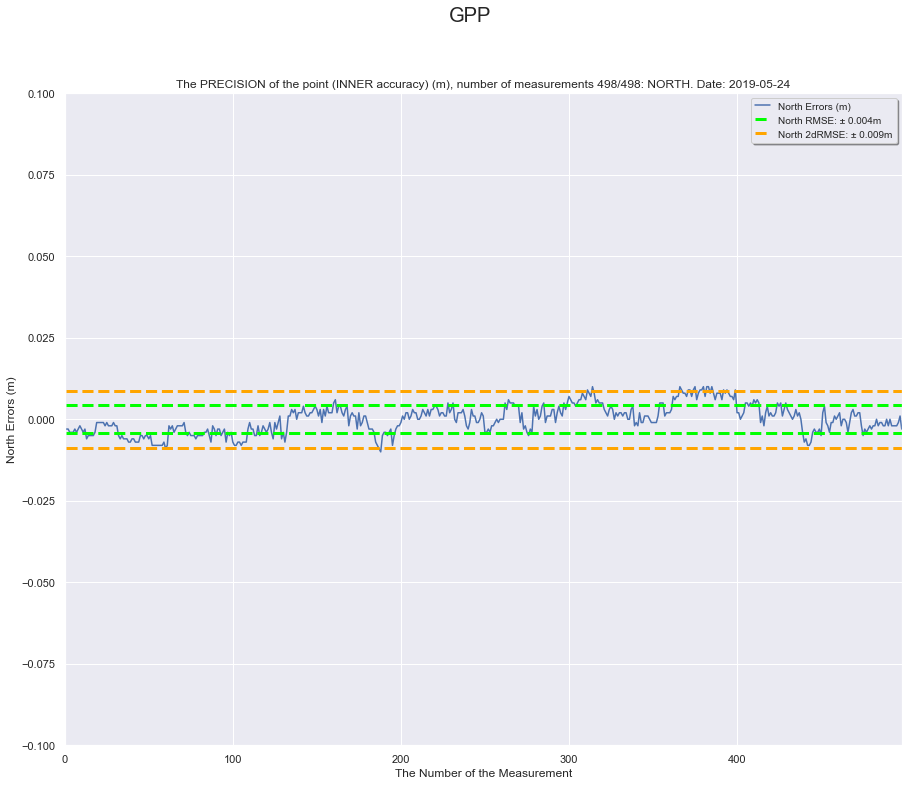

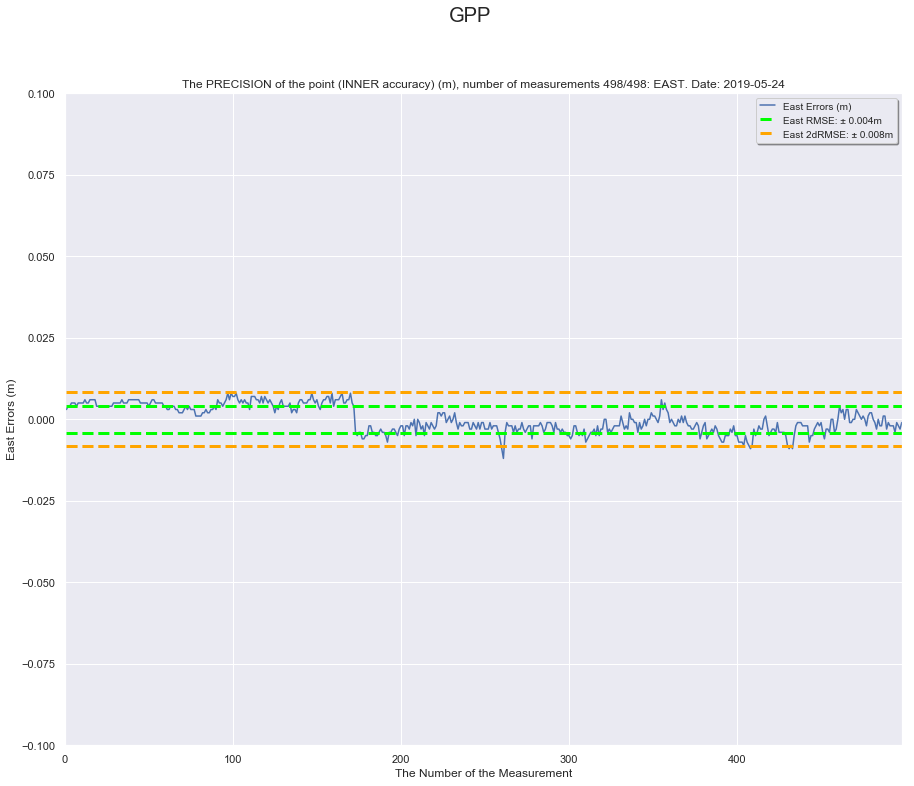

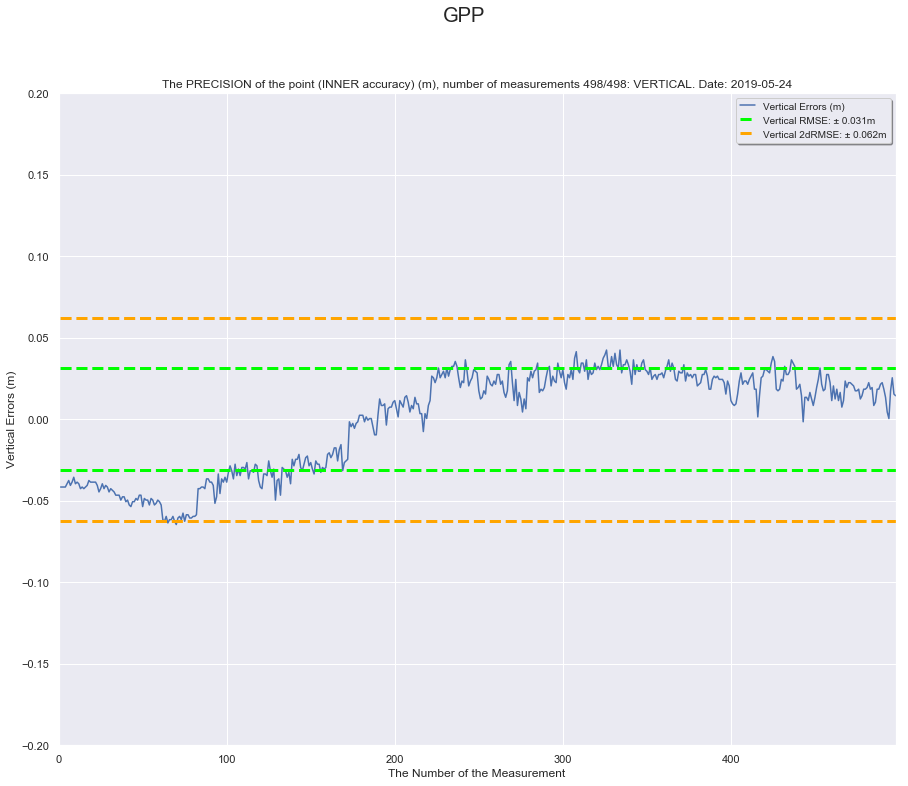

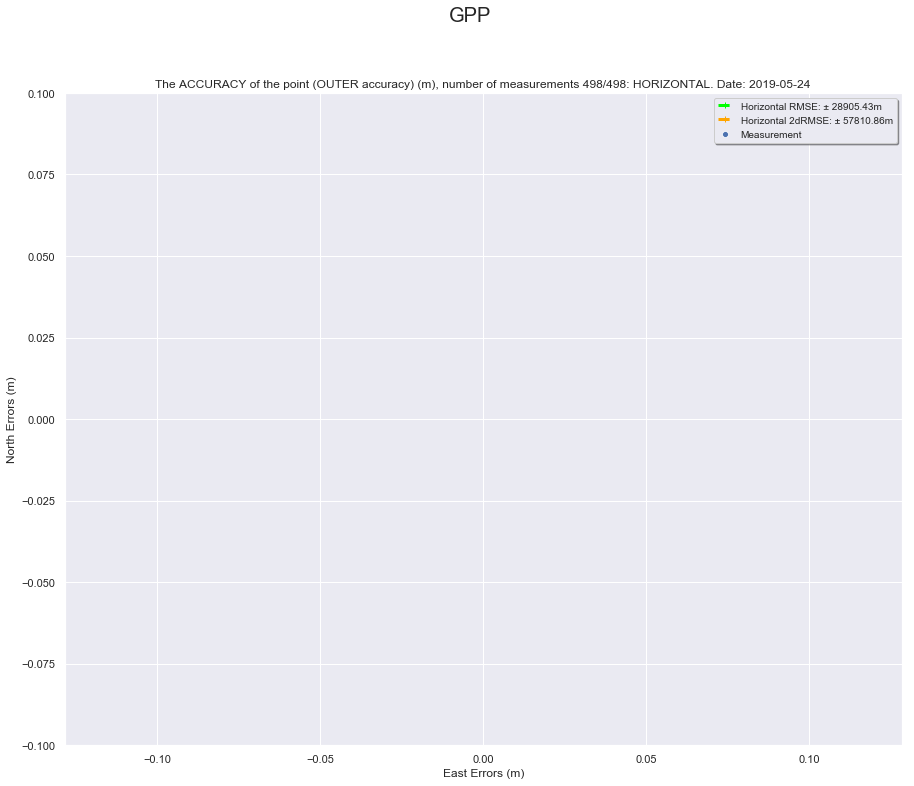

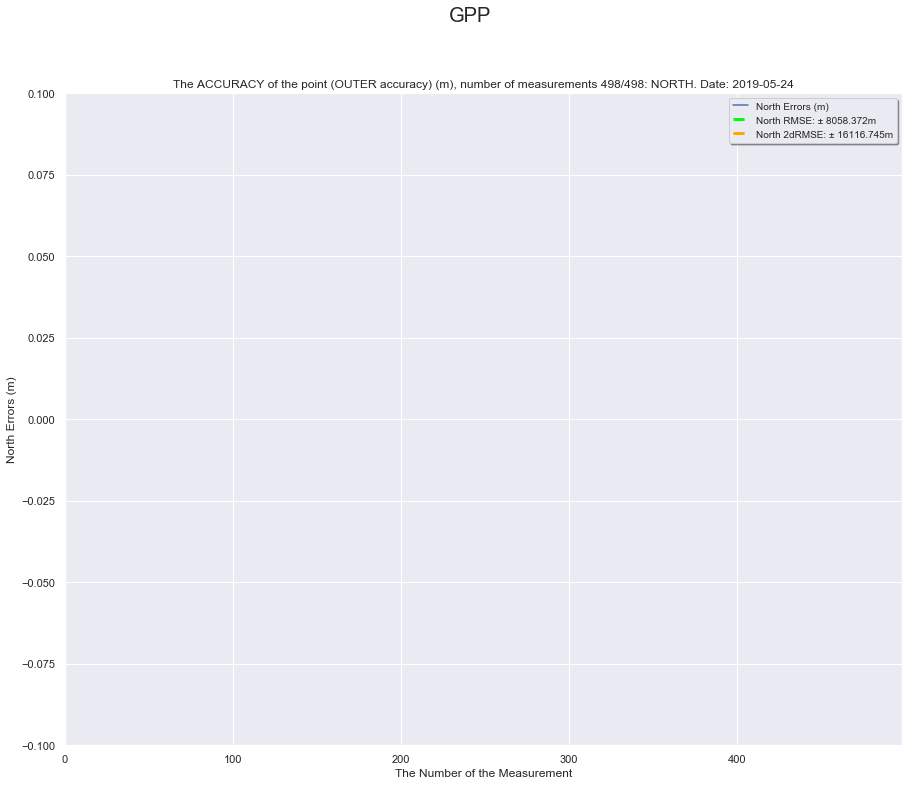

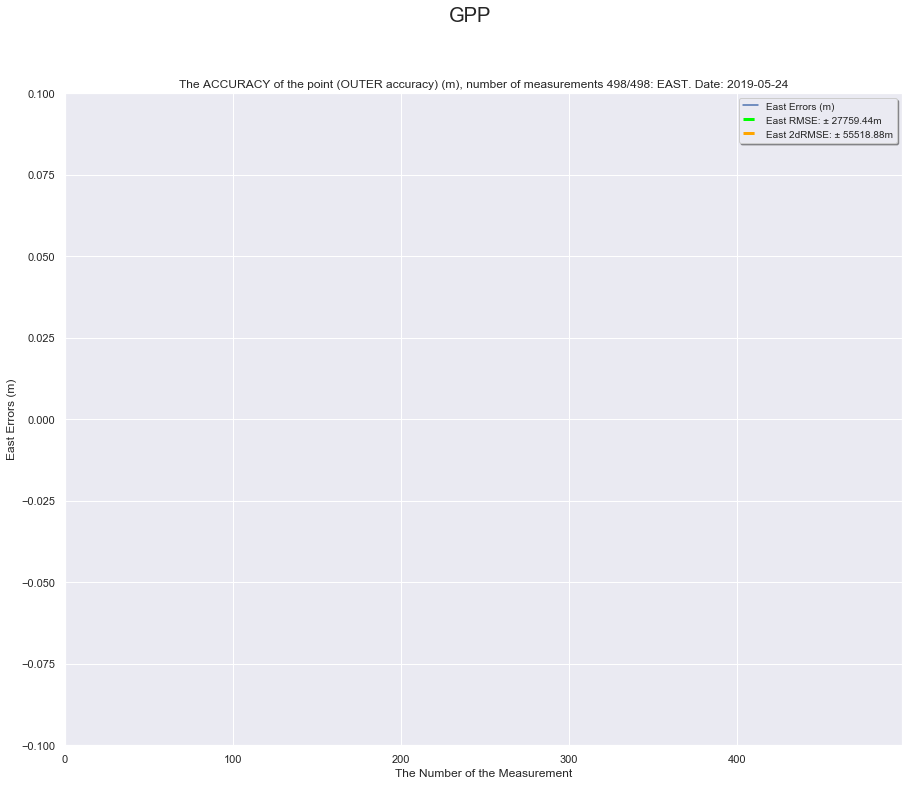

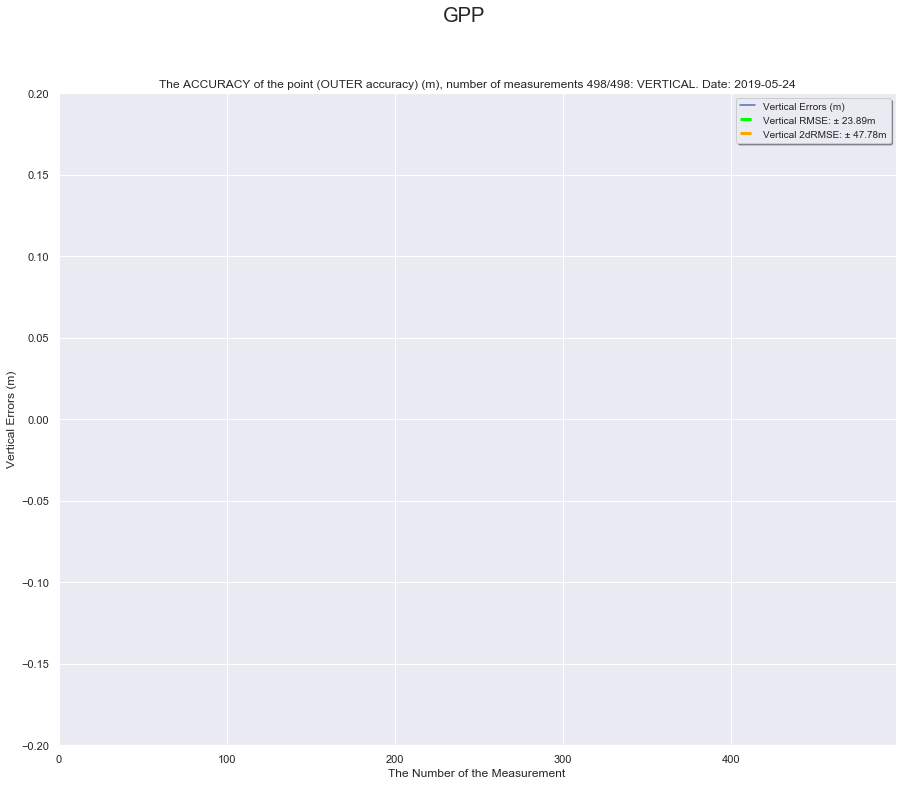

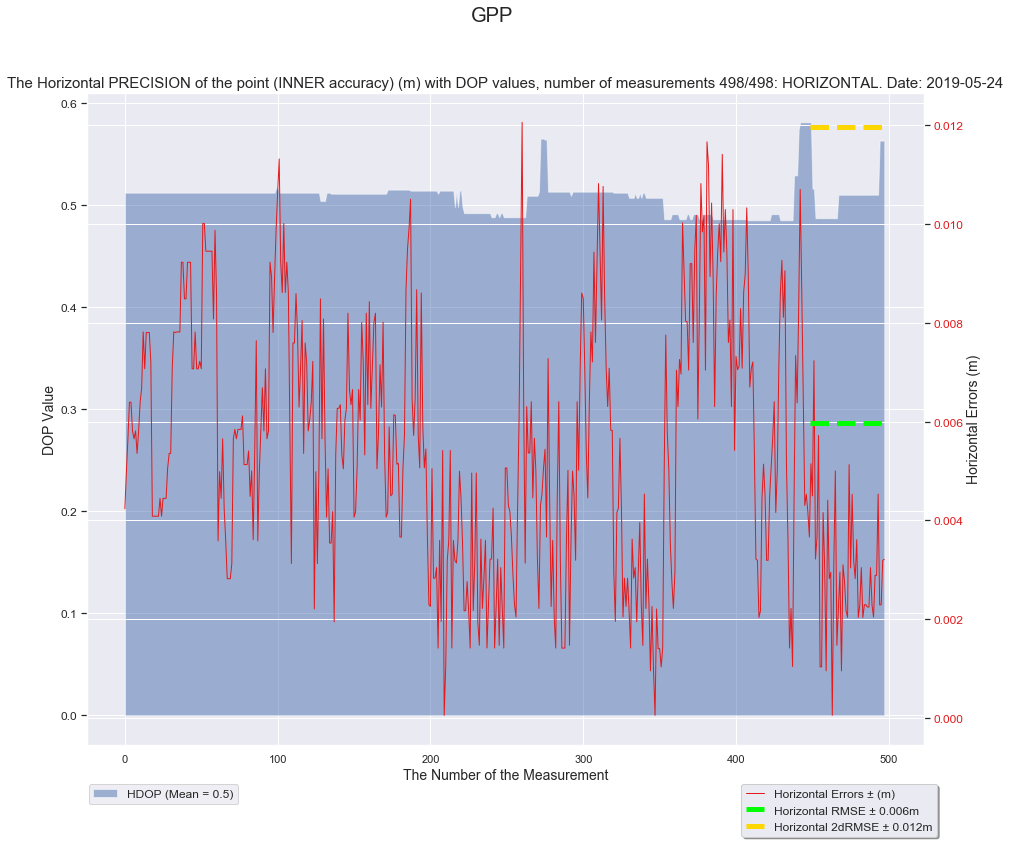

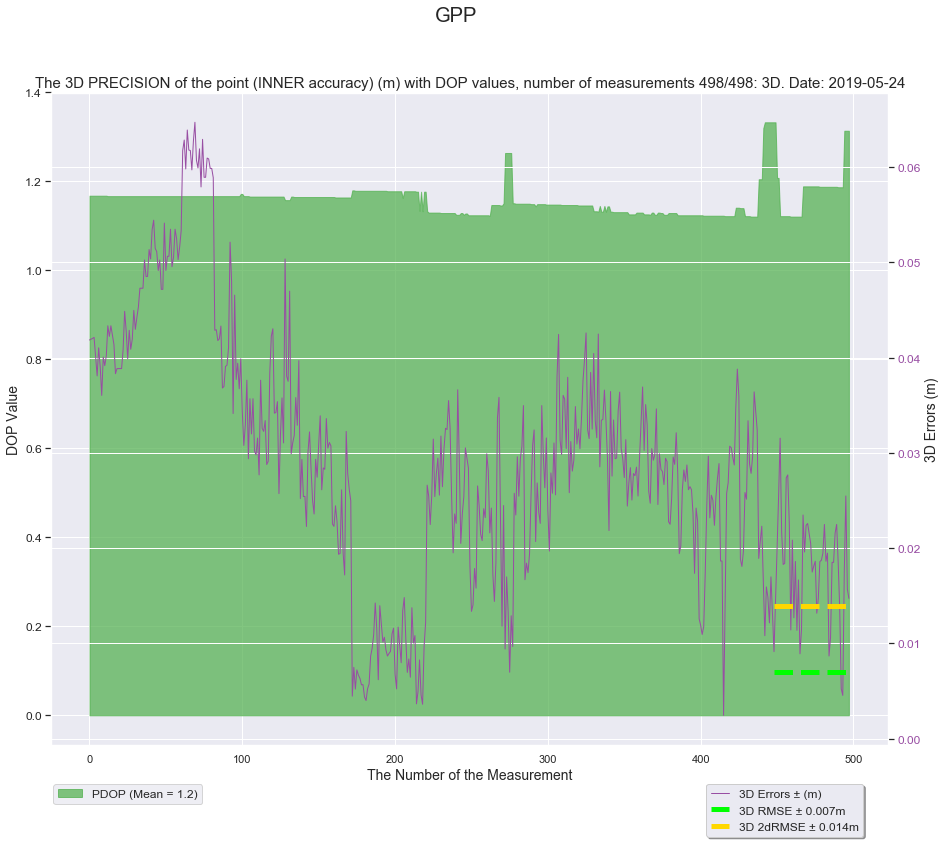

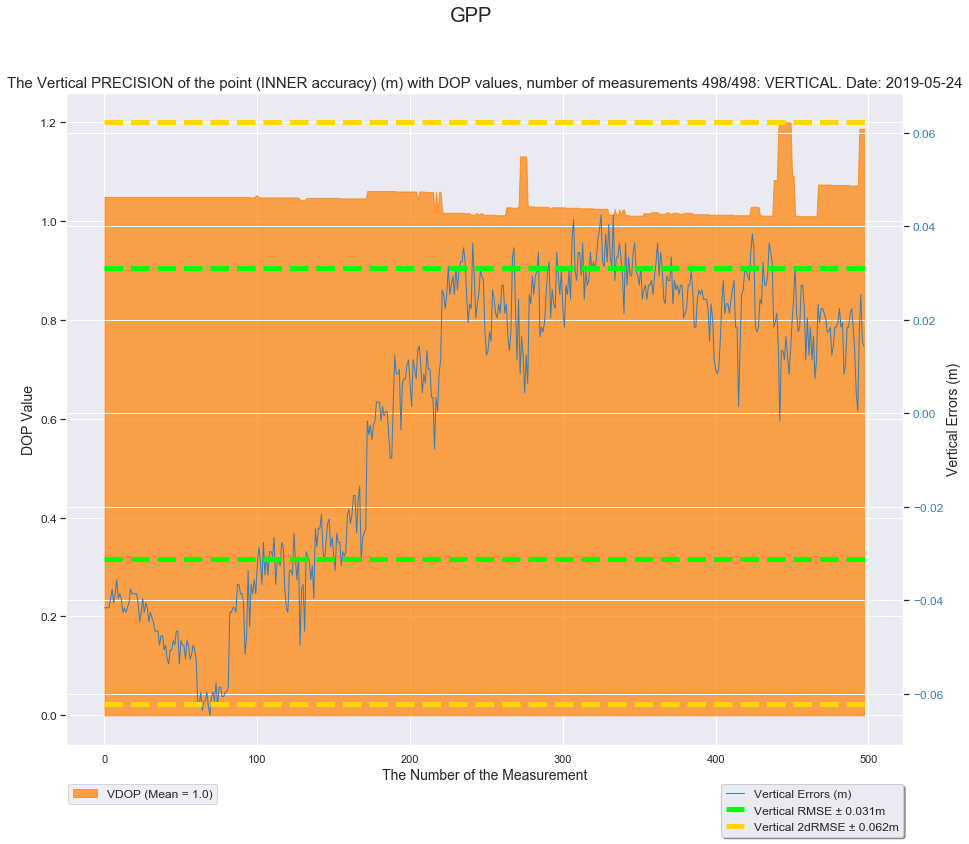

C:\Omat\Jupyter_Notebook\20190618_testiä1\1_2_E6\GPP\20190524-A-90M9180-GPP2-1_lyh\20190524-A-90M9180-GPP2-1_lyh_Measurement_Report.pdf created


**This program took 16.52s to finish!**

In [15]:
i = 0
testmeasurements_name_list = []
GNSS_device_or_NRTK_method_folder_path_list = []
testmeasurements_df_name_list = []
filepaths = []
filepaths_method_figures = []
while i < number_of_files:
    name_of_GNSS_device_or_NRTK_method = str(input("Enter the folder name of the GNSS device or Network-RTK method:\n"))
    testmeasurements_name_list.append(name_of_GNSS_device_or_NRTK_method)
    try:
        os.makedirs('{0}{2}{1}'.format(conclusions_folder_path, name_of_GNSS_device_or_NRTK_method, os.sep))
        GNSS_device_or_NRTK_method_folder_path = '{0}{2}{1}'.format(conclusions_folder_path, name_of_GNSS_device_or_NRTK_method, os.sep)
        GNSS_device_or_NRTK_method_folder_path_list.append(GNSS_device_or_NRTK_method_folder_path)
    except:
        print('Folder already exists. Use the existing folder location of the GNSS device or Network-RTK method {0}{2}{1}.'.format(conclusions_folder_path, name_of_GNSS_device_or_NRTK_method, os.sep))
        GNSS_device_or_NRTK_method_folder_path = '{0}{2}{1}'.format(conclusions_folder_path, name_of_GNSS_device_or_NRTK_method, os.sep)
        GNSS_device_or_NRTK_method_folder_path_list.append(GNSS_device_or_NRTK_method_folder_path)
    testmeasurements_df_name = input("Enter the name of the {} conclusions testmeasurements file (the whole name with .txt or .csv ending). The data has to be formatted as (Point Number,Code,Date,Time,Solution,Physical Station ID,Virtual Station ID,Northing,Easting,Ell Ht,Elev,Ant Ht,HRMS,VRMS,HDOP,VDOP,PDOP,GDOP,TDOP,GPS,GLONASS,GALILEO,BEIDOU,SBAS,QZSS) and the file has to be located in the same folder as this Jupyter Notebook file:\n".format(name_of_GNSS_device_or_NRTK_method))
    testmeasurements_df_name_list.append(testmeasurements_df_name)
    i += 1

j = 0
while j < len(testmeasurements_name_list):
    name_of_GNSS_device_or_NRTK_method = testmeasurements_name_list[j]
    GNSS_device_or_NRTK_method_folder_path = GNSS_device_or_NRTK_method_folder_path_list[j]
    testmeasurements_df_name = testmeasurements_df_name_list[j]
    table1_df, table2_df, filename_path = run_NLS_GNSS_SOFAMESA_conclusions(name_of_GNSS_device_or_NRTK_method, testmeasurements_df_name)
    testmeasurements_df_name = testmeasurements_df_name.split('.')[0]
    table1_df.name = str(name_of_GNSS_device_or_NRTK_method)
    table2_df.name = str(name_of_GNSS_device_or_NRTK_method)
    if j == 0:
        all_table1s = pd.DataFrame(table1_df)
        all_table1s.rename(columns = {'Parameter': 'Parameter', 'Value': '{}'.format(name_of_GNSS_device_or_NRTK_method)}, inplace=True)
        all_table2s = pd.DataFrame(table2_df)
        all_table2s.rename(columns = {'Parameter': 'Parameter', 'Precision*': '{}: P*'.format(name_of_GNSS_device_or_NRTK_method), 'Accuracy**': '{}: A**'.format(name_of_GNSS_device_or_NRTK_method)}, inplace=True)
    if j > 0:
        table1_df.rename(columns = {'Parameter': 'Parameter', 'Value': '{}'.format(name_of_GNSS_device_or_NRTK_method)}, inplace=True)
        all_table1s = pd.concat([all_table1s, table1_df.loc[:, '{}'.format(name_of_GNSS_device_or_NRTK_method)]], axis = 1)
        table2_df.rename(columns = {'Parameter': 'Parameter', 'Precision*': '{}: P*'.format(name_of_GNSS_device_or_NRTK_method), 'Accuracy**': '{}: A**'.format(name_of_GNSS_device_or_NRTK_method)}, inplace=True)
        all_table2s = pd.concat([all_table2s, table2_df.loc[:, '{}: P*'.format(name_of_GNSS_device_or_NRTK_method)], table2_df.loc[:, '{}: A**'.format(name_of_GNSS_device_or_NRTK_method)]], axis = 1)
    filepaths.append(filename_path)
    filepaths_method_figures.append(session_folder_path)
    
    exec("table1_df.to_csv(os.path.join(GNSS_device_or_NRTK_method_folder_path, testmeasurements_df_name, r'{}_table1.csv'))".format(testmeasurements_df_name))
    exec("table2_df.to_csv(os.path.join(GNSS_device_or_NRTK_method_folder_path, testmeasurements_df_name, r'{}_table2.csv'))".format(testmeasurements_df_name))
    j += 1
    
exec("all_table1s.to_csv(os.path.join(conclusions_folder_path, r'{0}_{1}_Visits_Conclusions_Statistics_Table1.csv'))".format(name_of_the_reference_point_folder, total_number_of_visits_at_the_reference_point))
exec("all_table2s.to_csv(os.path.join(conclusions_folder_path, r'{0}_{1}_Visits_Conclusions_Statistics_Table2.csv'))".format(name_of_the_reference_point_folder, total_number_of_visits_at_the_reference_point))

Luetaan tolerance_values_conclusions_tables.txt-tiedosto, jossa on määritetty eri parametreilla raja-arvoja. / Let's read tolerance_values_conclusions_tables.txt file, in which has been defined tolerance values for different parameters:

In [1]:
tolerance_values_conclusions_tables_df = pd.read_csv('tolerance_values_conclusions_tables.txt', sep = ',')

NameError: name 'pd' is not defined

Määritetään Table 3 eri laitteiden ja menetelmien vertaamista varten. / Let's define Table 3 in order to compare different devices or methods:

In [ ]:
table3_df = pd.DataFrame({'Parameter*': ['Fixed Solutions % (With Outliers)',
                                        'Above Tolerance Values %',
                                        'Fixed Solutions % (No Outliers)',
                                        'Mean of PDOPs',
                                        'Mean of GDOPs',
                                        'Precision: Horizontal RMSE \xb1 (m)',
                                        'Precision: Vertical RMSE \xb1 (m)',
                                        'Accuracy: Horizontal RMSE \xb1 (m)',
                                        'Accuracy: Vertical RMSE \xb1 (m)',
                                        'Precision: North Coordinate Std \xb1 (m)',
                                        'Precision: East Coordinate Std \xb1 (m)',
                                        'Precision: Height Std \xb1 (m)']})
table3_df = table3_df_definition.define_table3_df(np, pd, all_table1s, all_table2s, table3_df, tolerance_values_conclusions_tables_df[['Weighing']])

Määritetään värikoodaus eri parametrien raja-arvoihin perustuen. (KESKEN) / Let's define color coding based on the the tolerance values of the different parameters (IN PROGRESS):

In [ ]:
o = 0
rows_length_table3_df = table3_df.shape[0]
column_names_table3 = list(all_table1s.columns.values)
p = 1
columns_length_table3 = all_table1s.shape[1]
q = 1

while o < rows_length_table3_df:
    while q < columns_length_table3:
        values_for_comparison = [tolerance_values_conclusions_tables_df.iloc[o, 1],
                                 tolerance_values_conclusions_tables_df.iloc[o, 2],
                                 tolerance_values_conclusions_tables_df.iloc[o, 3],
                                 tolerance_values_conclusions_tables_df.iloc[o, 4],
                                 tolerance_values_conclusions_tables_df.iloc[o, 5],
                                 tolerance_values_conclusions_tables_df.iloc[o, 6],
                                 tolerance_values_conclusions_tables_df.iloc[o, 7],
                                 tolerance_values_conclusions_tables_df.iloc[o, 8],
                                 tolerance_values_conclusions_tables_df.iloc[o, 9]]
        value = table3_df.iloc[o, p]
        
        def colors_tables(value):
            val = value
            # print('colors_tables')
            if values_for_comparison[1] < values_for_comparison[0]:
                if val <= values_for_comparison[0] and val >= values_for_comparison[1]:
                    color = 'forestgreen'
                elif val < values_for_comparison[2] and val >= values_for_comparison[3]:
                    color = 'greenyellow'
                elif val < values_for_comparison[4] and val >= values_for_comparison[5]:
                    color = 'yellow'
                elif val < values_for_comparison[6] and val >= values_for_comparison[7]:
                    color = 'orange'
                elif val < values_for_comparison[8]:
                    color = 'red'
                else:
                    color = 'white'
                # print(color)

                return 'background-color: %s' % color

            else:
                if val >= 0 and val <= values_for_comparison[1]:
                    color = 'forestgreen'
                elif val > values_for_comparison[2] and val <= values_for_comparison[3]:
                    color = 'greenyellow'
                elif val > values_for_comparison[4] and val <= values_for_comparison[5]:
                    color = 'yellow'
                elif val > values_for_comparison[6] and val <= values_for_comparison[7]:
                    color = 'orange'
                elif val > values_for_comparison[8]:
                    color = 'red'
                else:
                    color = 'white'
                # print(color)

                return 'background-color: %s' % color        
        
        table3_df.style.applymap(colors_tables(value), subset = (o, p))
        p += 1
        q += 1
    p = 1
    q = 1
    o += 1
    values_for_comparison = [None] * 9

exec("table3_df.to_csv(os.path.join(conclusions_folder_path, r'{0}_{1}_Visits_Conclusions_Statistics_Table3.csv'))".format(name_of_the_reference_point_folder, total_number_of_visits_at_the_reference_point))
# print(table3_df)

Pisteytetään paremmuusjärjestykseen ja tuotetaan Table 4. / Let's grade and produce Table 4: 

In [1]:
column_method_names_table3 = column_names_table3[1:]
column_length_method_names = all_table1s.shape[1] - 1
table4_df_rows = [None] * column_length_method_names
table4_df = pd.DataFrame({'Ranking': column_method_names_table3, 
                          'Points In Total*': table4_df_rows,
                          'Fixed Sol. (With Outliers)': table4_df_rows,
                          'Above Tolerance': table4_df_rows,
                          'Fixed Sol.': table4_df_rows,
                          'Mean PDOPs': table4_df_rows,
                          'Mean GDOPs': table4_df_rows,
                          'P: HRMSE': table4_df_rows,
                          'P: VRMSE': table4_df_rows,
                          'A: HRMSE': table4_df_rows,
                          'A: VRMSE': table4_df_rows,
                          'P: N Std': table4_df_rows,
                          'P: E Std': table4_df_rows,
                          'P: H Std': table4_df_rows})

rows_length_table3_df = table3_df.shape[0]
columns_length_table3 = all_table1s.shape[1]

r = 0
s = 1
t = 1
u = 2
v = 0

while r < rows_length_table3_df:
    while t < columns_length_table3:
        value = table3_df.iloc[r, s]
        grade = grading_conclusions.grading(value,
                            tolerance_values_conclusions_tables_df.iloc[r, 1],
                            tolerance_values_conclusions_tables_df.iloc[r, 2],
                            tolerance_values_conclusions_tables_df.iloc[r, 3],
                            tolerance_values_conclusions_tables_df.iloc[r, 4],
                            tolerance_values_conclusions_tables_df.iloc[r, 5],
                            tolerance_values_conclusions_tables_df.iloc[r, 6],
                            tolerance_values_conclusions_tables_df.iloc[r, 7],
                            tolerance_values_conclusions_tables_df.iloc[r, 8],
                            tolerance_values_conclusions_tables_df.iloc[r, 9],
                            tolerance_values_conclusions_tables_df.iloc[r, 10])
        table4_df.iloc[v, u] = grade
        s += 1
        t += 1
        v += 1
    s = 1
    t = 1
    v = 0
    r += 1
    u += 1

rows_length_table4_df = table4_df.shape[0]
w = 0

while w < rows_length_table4_df:
    table4_df.iloc[w, 1] = table4_df.iloc[w, 2:].sum()
    w += 1
    
table4_df = table4_df.sort_values(by = 'Points In Total*', ascending = False)
    
exec("table4_df.to_csv(os.path.join(conclusions_folder_path, r'{0}_{1}_Visits_Conclusions_Statistics_Table4.csv'))".format(name_of_the_reference_point_folder, total_number_of_visits_at_the_reference_point))
# print(table4_df)

IndentationError: expected an indented block (<ipython-input-1-f4a741b41bb5>, line 31)

Tehdään tolerance_values_conclusions_tables.txt-tiedoston perusteella table5_df pisteytyksen selittämistä varten. / Let's make a table5_df based on tolerance_values_conclusions_tables.txt file in order to explain the grading:

In [ ]:
tolerance_values_conclusions_tables_df = tolerance_values_conclusions_tables_df.apply(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)
# print(tolerance_values_conclusions_tables_df)
table5_df = pd.DataFrame({'Parameter': ['Fixed Solutions % (With Outliers)',
                                        'Above Tolerance Values %',
                                        'Fixed Solutions % (No Outliers)',
                                        'Mean of PDOPs',
                                        'Mean of GDOPs',
                                        'Precision: Horizontal RMSE \xb1 (m)',
                                        'Precision: Vertical RMSE \xb1 (m)',
                                        'Accuracy: Horizontal RMSE \xb1 (m)',
                                        'Accuracy: Vertical RMSE \xb1 (m)',
                                        'Precision: North Coordinate Std \xb1 (m)',
                                        'Precision: East Coordinate Std \xb1 (m)',
                                        'Precision: Height Std \xb1 (m)'],
                         '5 Points*': ['{0} \u2265 value \u2265 {1}'.format(tolerance_values_conclusions_tables_df.iloc[0, 1], tolerance_values_conclusions_tables_df.iloc[0, 2]),
                                     '0 \u2264 value \u2264 {0}'.format(tolerance_values_conclusions_tables_df.iloc[1, 2]),
                                     '{0} \u2265 value \u2265 {1}'.format(tolerance_values_conclusions_tables_df.iloc[2, 1], tolerance_values_conclusions_tables_df.iloc[2, 2]),
                                     '0 \u2264 value \u2264 {0}'.format(tolerance_values_conclusions_tables_df.iloc[3, 2]),
                                     '0 \u2264 value \u2264 {0}'.format(tolerance_values_conclusions_tables_df.iloc[4, 2]),
                                     '0 \u2264 value \u2264 {0}'.format(tolerance_values_conclusions_tables_df.iloc[5, 2]),
                                     '0 \u2264 value \u2264 {0}'.format(tolerance_values_conclusions_tables_df.iloc[6, 2]),
                                     '0 \u2264 value \u2264 {0}'.format(tolerance_values_conclusions_tables_df.iloc[7, 2]),
                                     '0 \u2264 value \u2264 {0}'.format(tolerance_values_conclusions_tables_df.iloc[8, 2]),
                                     '0 \u2264 value \u2264 {0}'.format(tolerance_values_conclusions_tables_df.iloc[9, 2]),
                                     '0 \u2264 value \u2264 {0}'.format(tolerance_values_conclusions_tables_df.iloc[10, 2]),
                                     '0 \u2264 value \u2264 {0}'.format(tolerance_values_conclusions_tables_df.iloc[11, 2])],
                         '4 Points*': ['{0} > value \u2265 {1}'.format(tolerance_values_conclusions_tables_df.iloc[0, 3], tolerance_values_conclusions_tables_df.iloc[0, 4]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[1, 3], tolerance_values_conclusions_tables_df.iloc[1, 4]),
                                     '{0} > value \u2265 {1}'.format(tolerance_values_conclusions_tables_df.iloc[2, 3], tolerance_values_conclusions_tables_df.iloc[2, 4]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[3, 3], tolerance_values_conclusions_tables_df.iloc[3, 4]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[4, 3], tolerance_values_conclusions_tables_df.iloc[4, 4]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[5, 3], tolerance_values_conclusions_tables_df.iloc[5, 4]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[6, 3], tolerance_values_conclusions_tables_df.iloc[6, 4]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[7, 3], tolerance_values_conclusions_tables_df.iloc[7, 4]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[8, 3], round(tolerance_values_conclusions_tables_df.iloc[8, 4], 3)),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[9, 3], tolerance_values_conclusions_tables_df.iloc[9, 4]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[10, 3], tolerance_values_conclusions_tables_df.iloc[10, 4]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[11, 3], tolerance_values_conclusions_tables_df.iloc[11, 4])],
                         '3 Points*': ['{0} > value \u2265 {1}'.format(tolerance_values_conclusions_tables_df.iloc[0, 5], tolerance_values_conclusions_tables_df.iloc[0, 6]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[1, 5], tolerance_values_conclusions_tables_df.iloc[1, 6]),
                                     '{0} > value \u2265 {1}'.format(tolerance_values_conclusions_tables_df.iloc[2, 5], tolerance_values_conclusions_tables_df.iloc[2, 6]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[3, 5], tolerance_values_conclusions_tables_df.iloc[3, 6]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[4, 5], tolerance_values_conclusions_tables_df.iloc[4, 6]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[5, 5], tolerance_values_conclusions_tables_df.iloc[5, 6]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[6, 5], round(tolerance_values_conclusions_tables_df.iloc[6, 6], 3)),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[7, 5], tolerance_values_conclusions_tables_df.iloc[7, 6]),
                                     '{0} < value \u2264 {1}'.format(round(tolerance_values_conclusions_tables_df.iloc[8, 5], 3), tolerance_values_conclusions_tables_df.iloc[8, 6]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[9, 5], tolerance_values_conclusions_tables_df.iloc[9, 6]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[10, 5], tolerance_values_conclusions_tables_df.iloc[10, 6]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[11, 5], tolerance_values_conclusions_tables_df.iloc[11, 6])],
                         '2 Points*': ['{0} > value \u2265 {1}'.format(tolerance_values_conclusions_tables_df.iloc[0, 7], tolerance_values_conclusions_tables_df.iloc[0, 8]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[1, 7], tolerance_values_conclusions_tables_df.iloc[1, 8]),
                                     '{0} > value \u2265 {1}'.format(tolerance_values_conclusions_tables_df.iloc[2, 7], tolerance_values_conclusions_tables_df.iloc[2, 8]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[3, 7], tolerance_values_conclusions_tables_df.iloc[3, 8]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[4, 7], tolerance_values_conclusions_tables_df.iloc[4, 8]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[5, 7], tolerance_values_conclusions_tables_df.iloc[5, 8]),
                                     '{0} < value \u2264 {1}'.format(round(tolerance_values_conclusions_tables_df.iloc[6, 7], 3), tolerance_values_conclusions_tables_df.iloc[6, 8]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[7, 7], tolerance_values_conclusions_tables_df.iloc[7, 8]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[8, 7], tolerance_values_conclusions_tables_df.iloc[8, 8]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[9, 7], tolerance_values_conclusions_tables_df.iloc[9, 8]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[10, 7], tolerance_values_conclusions_tables_df.iloc[10, 8]),
                                     '{0} < value \u2264 {1}'.format(tolerance_values_conclusions_tables_df.iloc[11, 7], tolerance_values_conclusions_tables_df.iloc[11, 8])],
                         '1 Point*': ['{0} > value'.format(tolerance_values_conclusions_tables_df.iloc[0, 9]),
                                     '{0} < value'.format(tolerance_values_conclusions_tables_df.iloc[1, 9]),
                                     '{0} > value'.format(tolerance_values_conclusions_tables_df.iloc[2, 9]),
                                     '{0} < value'.format(tolerance_values_conclusions_tables_df.iloc[3, 9]),
                                     '{0} < value'.format(tolerance_values_conclusions_tables_df.iloc[4, 9]),
                                     '{0} < value'.format(tolerance_values_conclusions_tables_df.iloc[5, 9]),
                                     '{0} < value'.format(tolerance_values_conclusions_tables_df.iloc[6, 9]),
                                     '{0} < value'.format(tolerance_values_conclusions_tables_df.iloc[7, 9]),
                                     '{0} < value'.format(tolerance_values_conclusions_tables_df.iloc[8, 9]),
                                     '{0} < value'.format(tolerance_values_conclusions_tables_df.iloc[9, 9]),
                                     '{0} < value'.format(tolerance_values_conclusions_tables_df.iloc[10, 9]),
                                     '{0} < value'.format(tolerance_values_conclusions_tables_df.iloc[11, 9])]})
# print(table5_df)

Yhdistetään pdf-tiedostot yhdeksi pdf-tiedostoksi: / Let's merge multiple pdf files together:

In [ ]:
%run create_combined_pdf_conclusions.ipynb

In [ ]:
time_ending = time.time()
display(Markdown('**This program took {}s to finish!**'.format(round(time_ending-time_beginning, 2))))

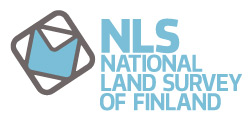
                  
                   
                    Author: Tuukka Mattila
                    Do not hesitate to contact via LinkedIn:
                    https://www.linkedin.com/in/tuukkamattila/
                    
                    Thank you for the help: Topi Rikkinen, Marko Ollikainen, Antti Laaksonen, 
                    Hannu Koivula, Octavian Andrei, Mikael Kauhava, Timo Sallinen and Ari Huvinen